# Paso 1. Acceso a los datos y preparación para el análisis
Comenecemos importando las librerías necesarias, los archivos csv y familiaricémonos con los datos.

## Acceso a los datos y análisis exploratorio

In [1]:
# Importación de librerías.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# Acceso a los datos.
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
# Familiarización con 'visits'.
print(visits.head())
print()
visits.info()



    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usag

La variable ``visits`` contiene columnas que necesitan cambios. Ninguna respeta la convención 'snake_case'. Solucionaremos eso son una pequeña función después.

Las variables con estampas de tiempo (``End Ts`` y ``Start Ts``) deberían ser de tipo datetime. Las variables con identificadores (``Source Id`` y ``Uid``) deberían ser de tipo ``object``.

No hay datos nulos.

In [4]:
# Familiarización con 'orders'.
print(orders.head())
print()
orders.info()



                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


La tabla ``orders`` tiene los mismos problemas que ``visits``. Vamos a estandarizar sus nombres de columnas, hacer la estampa de tiempo (``Buy Ts``) de tipo ``datetime`` y hacer que el identificador (``Uid``) sea de tipo ``object`` porque no haremos nada de aritmética sobre él.

No hay datos nulos.

In [5]:
# Familiarización con 'costs'.
print(costs.head())
print()
costs.info()



   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Para variar, en ``costs`` no es necesario unificar los nombres de las columnas. Voy a hacer la fecha (``dt``) de tipo ``datetime`` y el identificador de la fuente de tráfico (``source_id``) de tipo ``object``.


No hay datos nulos.

## Limpieza y preparación para el análisis
Como necesitamos __unificar al formato 'snake_case'__ dos de nuestras tablas, empezaré por crear una pequeña función que modifique los nombres de las columnas. 

In [6]:
# Función 'to_snake_case'.
def to_snake_case(df):
    snake_case_columns = []
    for column in df.columns:
        column = column.strip().replace(' ', '_').lower()
        snake_case_columns.append(column)
    df.columns = snake_case_columns
    return df

# Modificación de las columnas de 'visits' y 'orders'.
to_snake_case(visits)
to_snake_case(orders)

# Comprobación
print(visits.columns)
print()
print(orders.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


A continuación __cambiaremos los tipos de datos__ del primer DataFrame (``visits``).

In [7]:
print(visits.columns)
# Empezaremos por las estampas de tiempo
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

# Haremos a los identificadores de tipo 'object'
visits['source_id'] = visits['source_id'].astype(object)
visits['uid'] = visits['uid'].astype(object)

# Comprobación
visits.info()

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  object        
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 13.7+ MB


Haremos lo mismo para el __segundo DataFrame__ (``orders``).

In [8]:
print(orders.columns)
# Estampa de tiempo convertida a 'datetime'.
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

# Identificador de usuario convertido a 'object'.
orders['uid'] = orders['uid'].astype(object)

# Comprobación
orders.info()


Index(['buy_ts', 'revenue', 'uid'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


Y finalmente limpiaremos el __tercer DataFrame__ (``costs``).

In [9]:
print(costs.columns)

# Identificador de funte de tráfico convertido a tipo 'object'.
costs['source_id'] = costs['source_id'].astype(object)

# Fecha convertida a tipo 'datetime'.
costs['dt'] = pd.to_datetime(costs['dt'])

# Comprobación
costs.info()

Index(['source_id', 'dt', 'costs'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   object        
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.7+ KB


Hemos __finalizado la limpieza de los datos__. Ahora comienza lo divertido.

# Paso 2. Informes y cálculos de métricas
## 1. Visitas
Comenzaremos a responder preguntas clave del primer DataFrame. Empecemos viendo cuál es su rango de fechas

In [10]:
visits_first_day = visits['start_ts'].min()
visits_last_day = visits['start_ts'].max()

print(f'Los datos de visitas comienzan en el día {visits_first_day}.')
print()
print(f'Los datos de las visitas terminan en el día {visits_last_day}.')

Los datos de visitas comienzan en el día 2017-06-01 00:01:00.

Los datos de las visitas terminan en el día 2018-05-31 23:59:00.


Tenemos __un año de datos__.

### ¿Cuántas personas usan Showz cada día, semana y mes?
#### Usuarios por día
Empecemos a calcular los usuarios por día. Primero tenemos que sacar el día de la estampa de tiempo en una nueva columna (``date``). Después agruparemos la tabla de diferente forma para saber los usuarios por día. 

In [11]:
# Creación de la columna date.
visits['date'] = visits['start_ts'].astype('datetime64[D]')

# Comprobación.
print(visits['date'])

0        2017-12-20
1        2018-02-19
2        2017-07-01
3        2018-05-20
4        2017-12-27
            ...    
359395   2017-07-29
359396   2018-01-25
359397   2018-03-03
359398   2017-11-02
359399   2017-09-10
Name: date, Length: 359400, dtype: datetime64[ns]


Tenemos la __fecha de cada visita__. Ahora veremos el __promedio de visitas por día__.

In [12]:
# Agrupación de la tabla saber cuántos usuarios hay por día.
visits_users_per_day = visits.groupby('date')['uid'].nunique()

# Variable que contiene el promedio de usuarios únicos por día.
average_visits_users_per_day = visits_users_per_day.mean()

# Información graficada.
print(f'El promedio de usuarios únicos por día es de {average_visits_users_per_day}.')

El promedio de usuarios únicos por día es de 907.9917582417582.


Información relevante, cerca de mil usuarios únicos en promedio cada día. __¿Pero qué días de la semana son los más populares?__ Hora de extraer el día de la semana.

In [13]:
# Extracción del día de la semana en una nueva columna.
visits['dotw'] = visits['date'].dt.weekday

# Comprobación
print(visits.head(3))

    device              end_ts source_id            start_ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   

                    uid       date  dotw  
0  16879256277535980062 2017-12-20     2  
1    104060357244891740 2018-02-19     0  
2   7459035603376831527 2017-07-01     5  


Hora de una __representación gráfica__.

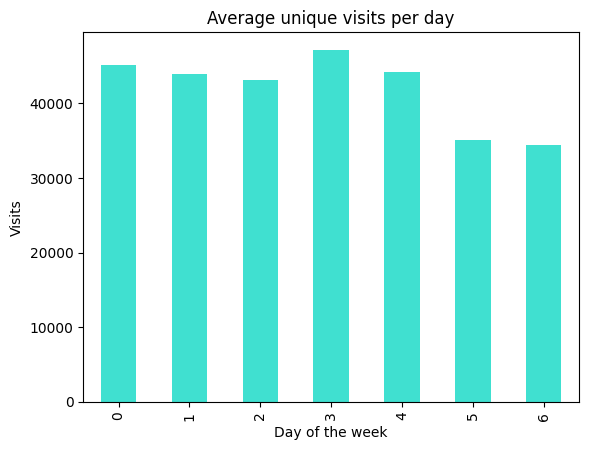

In [14]:
users_per_dotw = visits.groupby('dotw')['uid'].nunique()
users_per_dotw.plot.bar(
    xlabel = 'Day of the week',
    ylabel = 'Visits',
    color = 'turquoise'
)
plt.title('Average unique visits per day')
plt.show()


Los __fines de semana__ la página recibe menos usuarios. Entre semana, especialmente los __jueves__ el promedio de usuarios es mayor.

#### Usuarios por semana
Necesitamos crear una __columna__ que contenga la __semana__. Usaremos el calendario ISO.

In [15]:
# Creación de la columna con la semana del año
visits['iso_week'] = visits['date'].dt.isocalendar().week

# Comprobación
print(visits.head(3))

    device              end_ts source_id            start_ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   

                    uid       date  dotw  iso_week  
0  16879256277535980062 2017-12-20     2        51  
1    104060357244891740 2018-02-19     0         8  
2   7459035603376831527 2017-07-01     5        26  


Estamos usando el __calendario ISO__. Para evitar confusiones (la primera y última semana tienen el mismo número) también crearé una columna para el año.

Descubramos las __visitas semanales promedio__.

Las visitas semanales promedio son 5716.245283018868


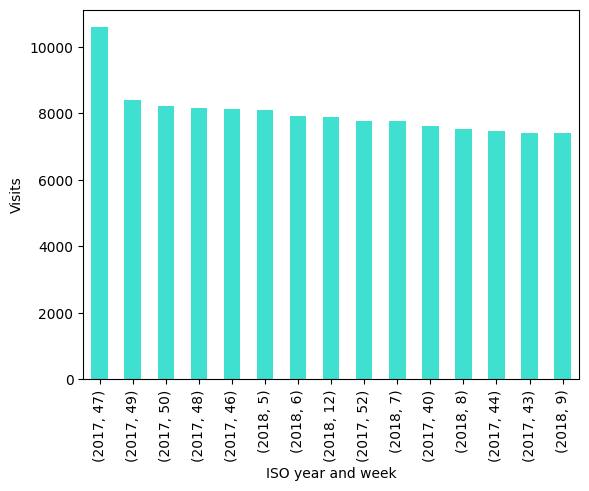

In [16]:
# Columna con el año ISO.
visits['iso_year'] = visits['date'].dt.isocalendar().year

# Agrupación de las visitas semanales.
weekly_users = visits.groupby(['iso_year', 'iso_week'])['uid'].nunique()
print('Las visitas semanales promedio son', weekly_users.mean())

# Variable que contiene las semanas con más visitas.
top_weeks = weekly_users.sort_values(ascending=False).head(15)

# Impresión de la variable
top_weeks.plot(kind = 'bar',
              xlabel = 'ISO year and week',
              ylabel = 'Visits',
              color = 'turquoise')
plt.title('')
plt.show()

La semana número 47 del calendario ISO (noviembre 20 al 26) de 2017 fue la que más visitas en promedio tuvo. Tuvo aproximadamente el __doble que el promedio__. Muchas de las semanas con más visitas son cercanas.

#### Usuarios por mes
Seguiremos la misma lógica. Almacenemos el __mes en una nueva columna__. Voy a truncar los meses. 

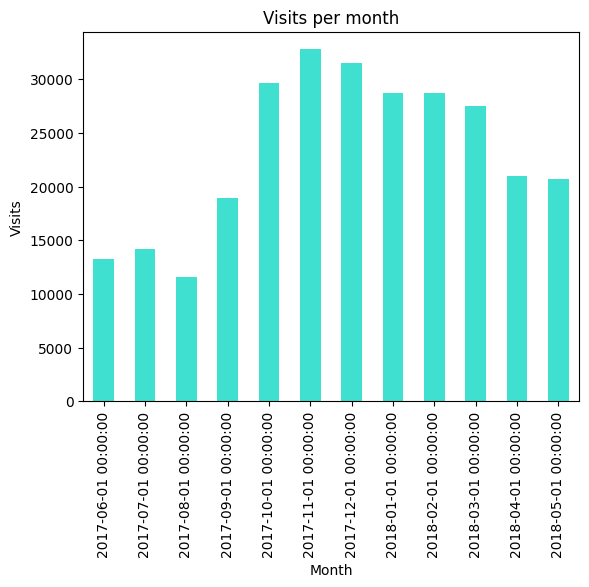

In [17]:
# Trunquemos el mes
visits['month'] = visits ['date'].astype('datetime64[M]')

# Almacenemos las visitas mensuales
monthly_visits = visits.groupby('month')['uid'].nunique()

# Grafiquemos
monthly_visits.plot(kind = 'bar',
                   xlabel= 'Month',
                   ylabel = 'Visits',
                   color = 'turquoise')
#plt.xticks(rotation = 80)
plt.title('Visits per month')
plt.show()

Los usuarios concentran un __mayor número de visitas__ en los los __primeros y últimos meses__ del año. A mediados de año el interés fue mucho menor. 

### ¿Cuántas sesiones hay por día?
Podemos responder a esta pregunta contando el número de valores en la columna ``start_ts`` o la columna que creamos (``date``). Es lo mismo.

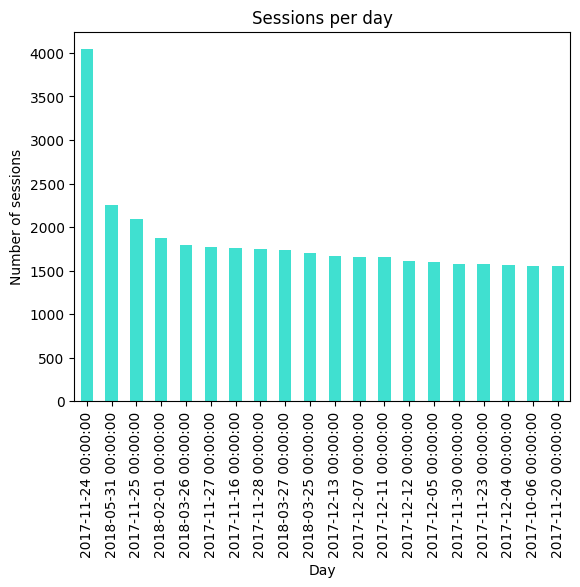

El día con más sesiones fue el 24 de noviembre.
El número de sesiones promedio por día es de 987.0
Ya sabíamos que promedio de usuarios único fue de 908.0


In [18]:
# Variable con las sesiones por día.
sessions_per_day = visits['date'].value_counts().sort_index()

#Grafica.
sessions_per_day.sort_values(ascending = False).head(20).plot(kind = 'bar',
                                                             xlabel = 'Day',
                                                             ylabel = 'Number of sessions',
                                                             color = 'turquoise')
plt.title('Sessions per day')
plt.show()

# Observaciones con variables.
print('El día con más sesiones fue el 24 de noviembre.')
print('El número de sesiones promedio por día es de', sessions_per_day.mean().round())
print('Ya sabíamos que promedio de usuarios único fue de', average_visits_users_per_day.round())

Esta información nos indica que __los usuarios no suelen visitar el sitio dos veces el mismo día__. ¿Será que el sitio funciona muy bien y no hay necesidad de volver el mismo día? ¿O que el sitio es terrible y los usuarios se quieren olvidar de él? ¿O ninguna de mis extremas hipótesis? 

### ¿Cuál es la duración de cada sesión?
Para responder a esta pregunta debemos restar las variables con las estampas de tiempo. Almacenaré la información en una nueva columna. La mantendremos como ``timedelta64`` en caso de necesitar hacer aritmética después.

In [19]:
# Resta de las estampas
visits['session_length'] = visits['end_ts'] - visits['start_ts']

# Comprobación
print(visits[['start_ts', 'end_ts', 'session_length']].head(3))

             start_ts              end_ts  session_length
0 2017-12-20 17:20:00 2017-12-20 17:38:00 0 days 00:18:00
1 2018-02-19 16:53:00 2018-02-19 17:21:00 0 days 00:28:00
2 2017-07-01 01:54:00 2017-07-01 01:54:00 0 days 00:00:00


Con la columna ``session_length`` podemos empezar a __responder algunas preguntas__. 

In [20]:
print('La sesión promedio dura', visits['session_length'].mean())
print()
print('La sesión más larga duró', visits['session_length'].max())
print()

La sesión promedio dura 0 days 00:10:43.025687256

La sesión más larga duró 0 days 11:51:00



Cada sesión dura en promedio __10 minutos con 43 segundos__. Vamos a verlo distribuido gráficamente.

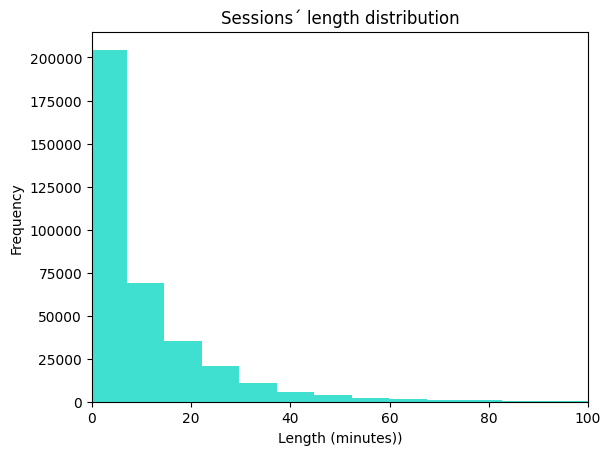

In [21]:
durations_in_minutes = visits['session_length'].dt.total_seconds() / 60
durations_in_minutes.plot(kind='hist',
                          bins=100,
                          color='turquoise')
plt.xlim(0, 100)
plt.xlabel('Length (minutes))')
plt.title('Sessions´ length distribution')
plt.show()


#### ¿Con qué frecuencia los usuarios regresan?
Para responder esta pregunta debemos agrupar con base en el ``uid`` y apoyarnos de la columna ``date``. Usaremos una función de agregación que no hemos visto mucho en el bootcamp: ``diff()``. Con ella se comparan los registros y obtenemos la diferencia entre cada uno.

Antes de usar ``diff()`` es necesario ordenar los datos de la columna por usuario y fecha con ``sort_values()``.

In [22]:
# Ordenamiento de los datos.
visits.sort_values(by=['uid', 'date'], inplace=True)

# Creamos una columna auxiliar con la fecha anterior para cada usuario. (Intente usar el método 'diff()' pero el kernel se moría).
previous_date = visits.groupby('uid')['date'].shift(1)

# Calculamos manualmente la diferencia.
return_frequency = visits['date'] - previous_date

# Comprobación.
print(return_frequency.head())


196543        NaT
257333        NaT
173818        NaT
173142        NaT
192554   153 days
Name: date, dtype: timedelta64[ns]


Calculemos el __promedio de frecuencia de retorno por usuario__ y más datos estadísticos con ``describe()``.

In [23]:
# Datos estadísticos en formato 'deltatime64'.
print(return_frequency.describe())
print()

# Diferencias entre media y mediana.
mean_return = return_frequency.mean()
median_return = return_frequency.median()
print(f"El retorno promedio de cada usuario es de {mean_return / pd.Timedelta(days=1):.2f} días.")
print(f"La mediana de retorno de cada usuario es de {median_return / pd.Timedelta(days=1):.2f} días.")

count                        131231
mean     28 days 02:33:52.477082396
std      49 days 17:31:33.195080023
min                 0 days 00:00:00
25%                 1 days 00:00:00
50%                 5 days 00:00:00
75%                32 days 00:00:00
max               363 days 00:00:00
Name: date, dtype: object

El retorno promedio de cada usuario es de 28.11 días.
La mediana de retorno de cada usuario es de 5.00 días.


La diferencia entre la media y la mediana es muy grande. __Hay usuarios que se olvidan completamente del sitio web durante mucho tiempo__. Como vimos anteriormente en las gráficas, el tráfico de la página es mayor a inicios y finales de año. Veamos estos datos gráficamente. Para evitar problemas al graficar voy a crear la variable ``return_days_frequency`` que contendrá los datos como días, no como ``timedelta64``.

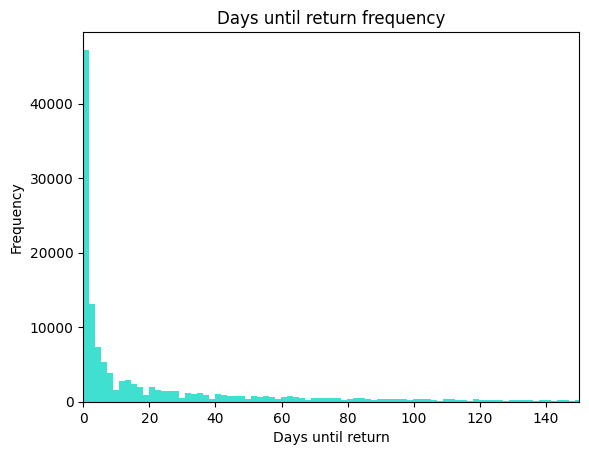

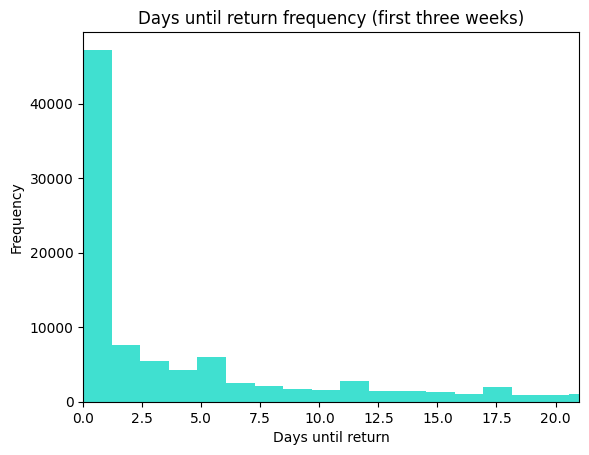

In [24]:
# Convertimos los días a número.
return_frequency_days = return_frequency.dt.days

# Ahora graficamos.
return_frequency_days.plot(kind='hist', 
                           bins=200, 
                           color='turquoise')
plt.xlabel('Days until return')
plt.title('Days until return frequency')
plt.xlim(0, 150)
plt.show()

# Concentrémonos en las primeras dos semanas.
return_frequency_days.plot(kind='hist', 
                           bins=300, 
                           color='turquoise')
plt.xlabel('Days until return')
plt.title('Days until return frequency (first three weeks)')
plt.xlim(0, 21)
plt.show()

Como indicaban los datos estadísticos, el DataFrame está __sesgado a la derecha__ por los usuarios que olvidan la página web y vuelven a ella después de varios meses. Esto se puede comprobar en la primera gráfica de barras.

La mayor parte de __los usuarios que vuelven__ lo hacen dentro de las __dos primeras semanas__, como podemos ver en la segunda gráfica de barras.

Otro dato revelante que podemos obtener a través de la variable ``return_frequency`` es el __porcentaje de usuarios que vuelven__. Debemos averiguar cuáles son los identificadores que tienen al menos una actividad no nula.

In [25]:
# Variable que contiene el total de usuarios únicos.
total_users = visits['uid'].nunique()

# Alineamos los índices.
return_frequency.index = visits.index

# Localizamos las filas de usuarios que tienen valores no nulos en 'return_frequency' y le pasamos el método 'unique'.
uids_with_returns = visits.loc[return_frequency.notna(), 'uid'].unique()

# Contamos a los usuarios que regresan.
returning_users = len(uids_with_returns)

# Porcentaje de usuarios que regresan.
returning_percentage = (returning_users / total_users) * 100

# Resultados.
print('El total de usuarios únicos es:', total_users)
print('De ellos regresan:', returning_users)
print(f'El procentaje de usuarios que regresan es de: {returning_percentage:.2f}%')


El total de usuarios únicos es: 228169
De ellos regresan: 52128
El procentaje de usuarios que regresan es de: 22.85%


Una __quinta parte de los usuarios volvió__ a la pagína web durante el periodo del DataFrame. La página podría trabajar en hacer a sus clientes más leales para disminuir el tiempo entre visitas y aumentar sus ganacias.

Ya sabemos la __frecuencia temporal__ y el __porcentaje de retorno__.

Finalmente __analizaremos la frecuencia de retorno__.

El número promedio de visitas por usuario es de 1.5751482453795214


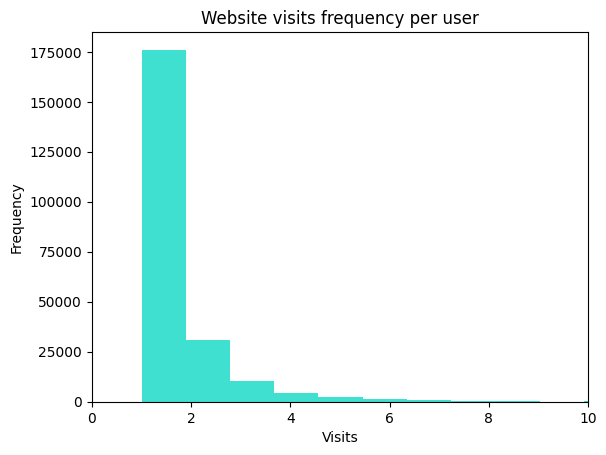

In [26]:
# Agrupamos por usuario y contamos las entradas de 'date' o 'start_ts'.
visits_per_user = visits.groupby('uid')['date'].count()
print('El número promedio de visitas por usuario es de', visits_per_user.mean())

# Vamos a graficar la frecuencia
visits_per_user.plot(kind = 'hist',
                    color = 'turquoise',
                    bins = 1000,
                     
                    )
plt.xlabel('Visits')
plt.title('Website visits frequency per user')
plt.xlim(0, 10)
plt.show()

Los internautas visitan el sitio web una o dos veces mayoritariamente. Pocas visitas durante el periodo que analizamos.

## 2. Ventas
Comenzaremos a responder preguntas clave del segundo DataFrame. Necesitamos información  de los dos primeros DataFrames: ``visits`` y ``orders``.
### ¿Cuándo empieza la gente a comprar y cuántos pedidos hacen durante un período de tiempo dado?
Crearé un nuevo DataFrame llamado ``orders_with_dates`` con la información con base en ``orders`` y ``visits`` . Necesitamos la primera visita (``first_visits``) y la primera compra (``first_orders``).

En este nuevo DataFrame tendré toda la información necesaria para descubrir la media y mediana de la __demora de conversión__. Además con base en la tabla podré desarrollar cohortes.

               buy_ts  revenue                   uid         first_visit  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:09:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:14:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:25:00   

       first_purchase  conversion_delay  
0 2017-06-01 00:10:00                 0  
1 2017-06-01 00:25:00                 0  
2 2017-06-01 00:27:00                 0  



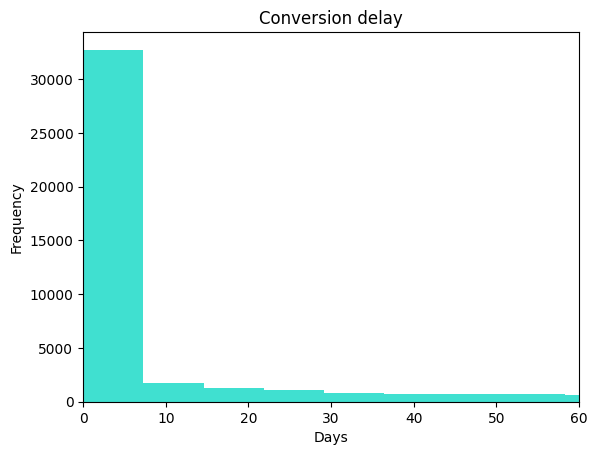

En promedio la demora de conversión es de 37.0 días.

La mediana de la demora de conversión es de 0.0 días.


In [27]:
# Primera visita por usuario.
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit']

# Primera compra por usuario.
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_purchase']

# Unión de ambas tablas de fechas.
user_firsts = first_visits.merge(first_orders, on='uid')

# Unión con el DataFrame original de órdenes.
orders_with_dates = orders.merge(user_firsts, on='uid', how='left')

# Cálculo del tiempo entre la primera visita y cada compra.
orders_with_dates['conversion_delay'] = (orders_with_dates['buy_ts'] - orders_with_dates['first_visit']).dt.days

# Comprobación.
print(orders_with_dates.head(3))
print()

# Representación gráfica.
orders_with_dates['conversion_delay'].plot(kind = 'hist', 
                                   color = 'turquoise',
                                    bins = 50)
plt.xlim (0, 60)
plt.title('Conversion delay')
plt.xlabel('Days')
plt.show()

# Promedio y mediana.
print(f"En promedio la demora de conversión es de {orders_with_dates['conversion_delay'].mean().round()} días.")
print()
print(f"La mediana de la demora de conversión es de {orders_with_dates['conversion_delay'].median().round()} días.")

El histograma anterior sugiere que __la mayor parte de la demora de conversión está contenida en la primera semana__.

El __promedio en la demora de conversión es 37 días__, pero __la mediana es de 0 días__. ¿Es el día cero también el valor con mayor frecuencia?

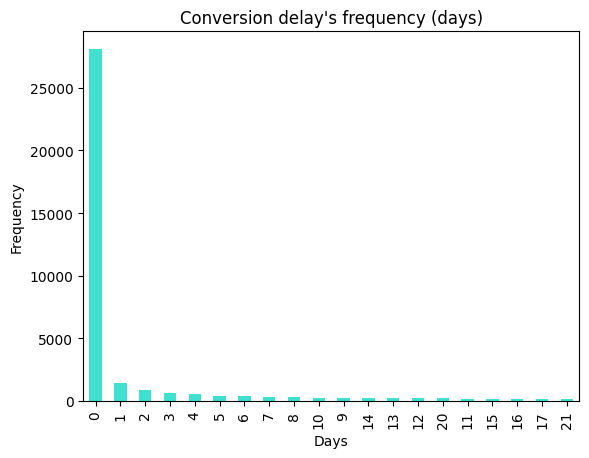

In [28]:
top_delay_days = orders_with_dates['conversion_delay'].value_counts().head(20)
top_delay_days.plot(kind = 'bar',
                   color = 'turquoise')
plt.title("Conversion delay's frequency (days)")
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

__El valor más frecuente, por una diferencia abismal, es de cero días__. 

__Hay usuarios con una demora de conversión de varios meses después de la primera visita__, por eso nuestra gráficas están sesgadas a la derecha.

A continuación desarrollaré cohortes de la demora de compra __tomando en cuenta días__, no semanas ni meses. Voy a agrupar toda la información relevante: usuarios únicos por cohorte, número de compras por cohorte, ingresos de cada cohorte, ingreso promedio por cohorte, etc.

In [29]:
# Agrupamos por cohorte comportamental (conversion_delay).
conversion_cohorts = orders_with_dates.groupby('conversion_delay').agg(
    num_users=('uid', 'nunique'),          # Usuarios únicos por cohorte.
    num_orders=('buy_ts', 'count'),        # Número de órdenes por cohorte.
    total_revenue=('revenue', 'sum'),      # Ingresos totales por cohorte.
    avg_revenue_per_order=('revenue', 'mean')  # Ingreso promedio por orden.
).reset_index().sort_values(by='conversion_delay')

# Comprobación.
print(conversion_cohorts.head(3))

   conversion_delay  num_users  num_orders  total_revenue  \
0                 0      26363       28103      115015.55   
1                 1       1343        1422        5787.35   
2                 2        786         837        3803.95   

   avg_revenue_per_order  
0               4.092643  
1               4.069866  
2               4.544743  


Como parecía, __la clave está en día cero__. El promedio de revenue por usuario no cambia mucho entre cohortes comportamentales, pero __la conversión y los ingresos totales son muchísimas veces mayores el día cero__. Las estrategias de marketing deberían esforzar sus esfuerzos en este periodo. Beneficios, promociones o descuentos por comprar en el día cero podrían aumentar los ingresos. 

Con toda esta información hemos respondido las dos primeras preguntas: __¿cuándo empieza la gente a comprar? y ¿cuántos pedidos hacen durante un periodo de tiempo dado?__, pues sabemos que la mayor parte de compras se hacen en el día cero y cuáles son el número de compras por cohorte. Continuemos con la tercera pregunta.

### ¿Cuál es el tamaño promedio de compra y cuánto dinero traen (LTV)?
Para responder a estas preguntas (y a las siguientes) voy a desarrollar algunos gráficos con base en ``convertion_cohorts``. Nos concentraremos en los clientes que compran en las primeras tres semanas, ya que en este lapso se contiene la mayor parte de ingresos y la mayor parte de clientes.

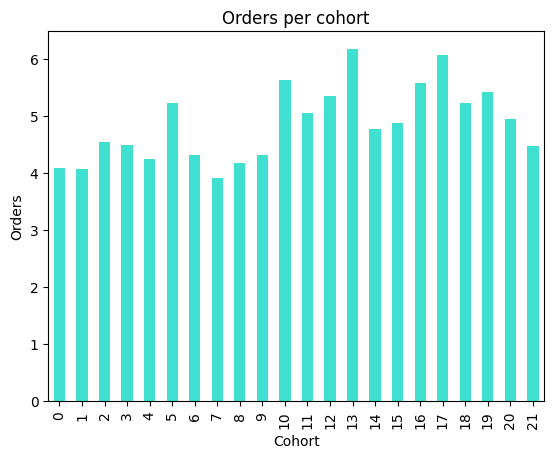


La media del promedio de compra es de 7.08 y la mediana es de 5.3. Los valores no difieren mucho entre cohortes.


In [30]:
# Nos concentraremos en las primeras tres semanas.
conversion_cohorts_data = conversion_cohorts.head(22)

# Graficamos.
conversion_cohorts_data.plot(kind = 'bar',
                            color = 'turquoise',
                            x = 'conversion_delay',
                            y = 'avg_revenue_per_order',
                            legend = False)
plt.xlabel('Cohort')
plt.ylabel('Orders')
plt.title('Orders per cohort')
plt.show()
print()

# Comparación con el promedio y la media.
conversion_cohorts_renenue_avg = conversion_cohorts['avg_revenue_per_order'].mean().round(2)
conversion_cohorts_renenue_median = conversion_cohorts['avg_revenue_per_order'].median().round(2)
print(f'La media del promedio de compra es de {conversion_cohorts_renenue_avg} y la mediana es de {conversion_cohorts_renenue_median}. Los valores no difieren mucho entre cohortes.')

A diferencia de los ingresos por cohorte o la diferencia de usuarios por cohorte, el __tamaño promedio de compra__ es parecido en cada cohorte. Si consideramos que el LTV es la cantidad total de dinero que un cliente aporta a la empresa en promedio al realizar compras, entonces __la respuesta es $7.08.__

## 3. Marketing
Comencemos el análisis del último DataFrame. Empecemos viendo cuántas fuentes de adquisición tenemos.

In [31]:
print(f"Ésta es la lista que contiene las fuentes de adquisión: {costs['source_id'].unique()}. Son un total de {costs['source_id'].nunique()} fuentes de adquisición identificadas con un número.")

Ésta es la lista que contiene las fuentes de adquisión: [1 2 3 4 5 9 10]. Son un total de 7 fuentes de adquisición identificadas con un número.


### ¿Cuánto dinero se gasto? 
Vamos a calcular los costos totales, por fuente y cómo los gastos cambiaron a los largo del tiempo.
#### Total
Sumatoria de los costos.

In [32]:
# Hacemos la suma de los gastos de la columna 'costs'.
total_costs = costs['costs'].sum()
print(f'El total gastado en marketing fue de ${total_costs:,.2f}')


El total gastado en marketing fue de $329,131.62


#### Por fuente de adquisición
Agrupación de los costos con base en el identificador (``source_id``).

In [33]:
# Costos agrupados con base a la fuente de adquisición.
costs_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print(costs_by_source)


source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


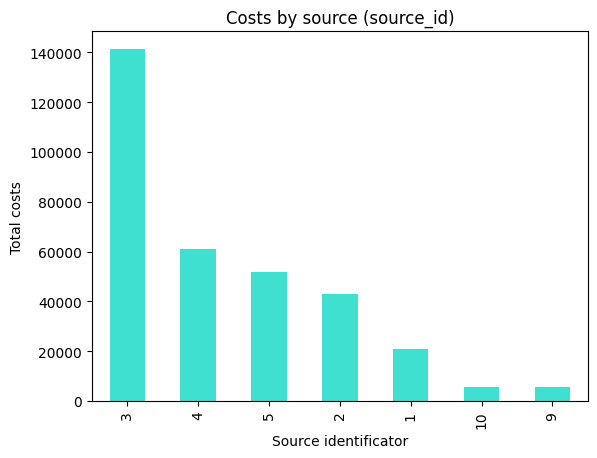

In [34]:
import matplotlib.pyplot as plt

costs_by_source.plot(kind='bar',
                    color = 'Turquoise')
plt.title('Costs by source (source_id)')
plt.xlabel('Source identificator')
plt.ylabel('Total costs')
plt.show()


La fuente de adquisión de mayor inversión fue la __fuente número 3__, en la que se invirtió más del doble que en la fuente número 4, la segunda fuente más popular.

#### A lo largo del tiempo
Agrupación de los costos con base al mes.

In [35]:
# Trunquemos el mes
costs['month'] = costs['dt'].astype('datetime64[M]')

# Agrupación con base en el mes.
costs_by_month = costs.groupby('month')['costs'].sum()
print(costs_by_month)


month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64


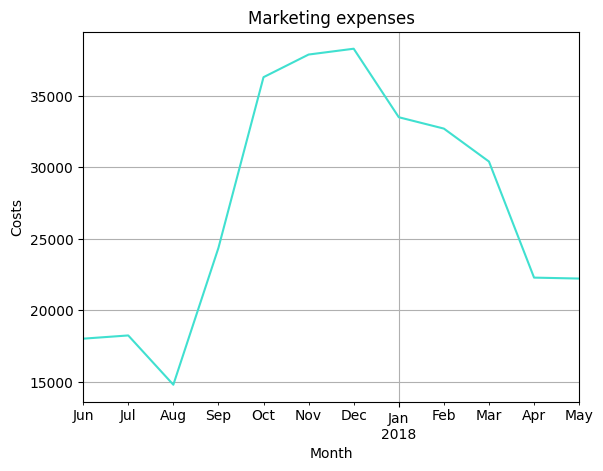

In [36]:
costs_by_month.plot(kind='line',
                    color = 'turquoise')
plt.title('Marketing expenses')
plt.xlabel('Month')
plt.ylabel('Costs')
plt.grid(True)
plt.show()


### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
Necesitamos dividir los costos por fuente sobre los usuarios por fuente. Almacenaremos la información en una tabla llamada 'cac'.

   source_id  total_costs  num_users       CAC
0          3    141321.63      74756  1.890439
3          2     42806.04      26245  1.631017
4          1     20833.27      18999  1.096546
2          5     51757.10      56974  0.908434
1          4     61073.60      83525  0.731201
5         10      5822.49       8067  0.721766
6          9      5517.49       9264  0.595584



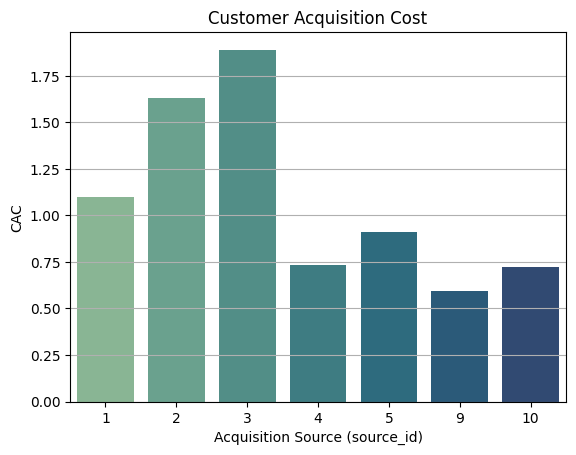

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nombraremos la segunda columna de 'costs_by_source' de forma descriptiva.
costs_by_source_df = costs_by_source.reset_index()
costs_by_source_df.columns = ['source_id', 'total_costs']

# Necesitamos también el número de usuarios por fuente. Agruparemos 'visits' con base en la fuente. Nombraremos la segunda columna de manera descriptiva también.
users_per_source = visits.groupby('source_id')['uid'].nunique().reset_index()
users_per_source.columns = ['source_id', 'num_users']

# Con los costos por fuente y el número de usuarios por fuente podemos saber cuál es el 'cac' por fuente.
cac = costs_by_source_df.merge(users_per_source, on='source_id')
cac['CAC'] = cac['total_costs'] / cac['num_users']

# Comprobación
print(cac.sort_values(by='CAC', ascending=False))
print()

# Graficamos la respuesta con Seaborn y la paleta 'crest'.
sns.barplot(data=cac.sort_values(by='CAC', ascending=False), x='source_id', y='CAC', palette='crest')
plt.title('Customer Acquisition Cost')
plt.xlabel('Acquisition Source (source_id)')
plt.ylabel('CAC')
plt.grid(True, axis='y')
plt.show()


Como era de esperarse la fuente número 3 es la de mayor costo por cliente. ¿Vale la pena en verdad invertir tanto por cada usuario a través de esa fuente? ¿Qué hay de las otras? Vamos a descubrirlo.

### ¿Cuán rentables eran las inversiones? Cálculo del 'return of marketing investment' (ROMI).
Para saber si en verdad vale la pena invertir como la compañía lo hace, necesitamos sacar el LTV promedio por cada fuente. Lo haremos a través de unir 'orders' con 'visits'. 

   source_id    ROMI_pct
1          4  983.674254
2          5  756.626826
4          1  742.852793
3          2  578.779768
6          9  539.148657
5         10  402.974740
0          3  235.588534


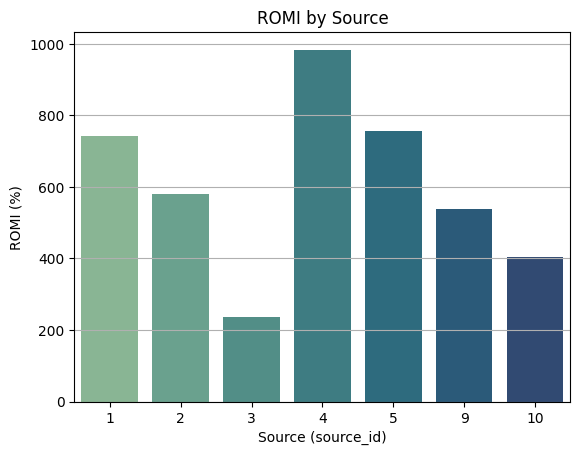

In [38]:
# Primero unimos 'orders' con 'visits' para obtener el 'source_id' de cada orden.
orders_visits = orders.merge(visits[['uid', 'source_id']], on='uid', how='left')

# Agrupamos por 'source_id' para sacar el LTV promedio ('avg_LTV'). Además nombramos la segunda columna correctamente.
ltv_by_source = orders_visits.groupby('source_id')['revenue'].mean().reset_index()
ltv_by_source.columns = ['source_id', 'avg_LTV']

# Unimos la tabla 'cac' con el ltv de cada fuente.
romi_df = cac.merge(ltv_by_source, on='source_id')

# Calculamos el ingreso total de marketing en nuestra nueva tabla de ROMI.
romi_df['marketing_revenue'] = romi_df['num_users'] * romi_df['avg_LTV']

# Calculamos el ROMI como porcentaje.
romi_df['ROMI_pct'] = ((romi_df['marketing_revenue'] - romi_df['total_costs']) / romi_df['total_costs']) * 100

# Impresión de la tabla de mayor a menor.
print(romi_df[['source_id', 'ROMI_pct']].sort_values(by='ROMI_pct', ascending=False))

# Graficamos el ROMI por fuente con seaborn y paleta 'crest'.
sns.barplot(data=romi_df.sort_values(by='ROMI_pct', ascending=False), x='source_id', y='ROMI_pct', palette='crest')
plt.title('ROMI by Source')
plt.xlabel('Source (source_id)')
plt.ylabel('ROMI (%)')
plt.grid(True, axis='y')
plt.show()


Contrario a lo que parecía, la fuente de adquisición número 3 es de menor retorno. Si bien el gasto en ella ha sido el mayor, la compañía debería considerar si vale la pena mantenerla. Los mejores desempeños los tienen las fuentes números 4, 5 y 1.

# Paso 3. Conclusión
## ¿Qué fuentes son las más recomendables?
Recumendaría invertir una mayor cantidad en las fuentes 4, 5 y 1. Todas ellas demuestran un retorno excepcional. La fuente número 3 es la más costosa y la que un menor retorno genera, por lo cual recomendaría que se preste atención a ella. La gran cantidad de ingresos que se le destina no parece justificada. Esta recomendación responde al ROMI y al costo por fuente.

La compañía tiene un ROMI excepcional y cada inversión en marketing está justificada, pero si se concentrarán en las fuentes de mayor retorno sus beneficios podrían ser mayores.

Respecto al análisis con base en la conversión, está claro que la compañía necesita que sus usuarios compren en el día cero. Estrategias de marketing que premien esta conducta mantendrán a la compañía con altos márgenes de conversión. Como pudimos comprobar al inicio del análisis, la gran mayoría de usuarios compran en el día cero, de allí que casi todo el 'revenue' de la compañía provenga de esa cohorte comportamental. Los usuarios en general no vuelven a la página. Un usuario que no convierta en el día cero es prácticamente una potencial compra perdida.

Es por esto mismo que también recomendaría que la compañía encuentre formas de que los usuarios vuelvan con más regularidad. Sin importar que los usuarios compren o no compren, es raro que vuelvan. La compañía podría considerar la opción de aumentar la frecuencia de retorno con promociones agresivas. 